In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data (1).csv')
df.head()

,league,season,date,team,h_a,result,pts,goals_scored,goals_missed,deep_passes,deep_passes_allowed,ppda,oppda
0,Bundesliga,2014,2014-08-22 19:30:00,Bayern Munich,h,w,3,2,1,5,4,9.625000,21.850000
1,Bundesliga,2014,2014-08-30 17:30:00,Bayern Munich,a,d,1,1,1,10,1,4.756098,17.695652
2,Bundesliga,2014,2014-09-13 14:30:00,Bayern Munich,h,w,3,2,0,13,3,5.060606,16.961538
3,Bundesliga,2014,2014-09-20 14:30:00,Bayern Munich,a,d,1,0,0,6,2,4.423077,9.446809
4,Bundesliga,2014,2014-09-23 19:00:00,Bayern Munich,h,w,3,4,0,23,2,4.250000,44.800000


In [3]:
df['league'].value_counts()

EPL           4560
La_liga       4560
Serie_A       4550
Ligue_1       4358
Bundesliga    3672
RFPL          2880
Name: league, dtype: int64

In [4]:
ligas = ['La_liga', 'EPL']
df_ligas = df[df['league'].isin(ligas)]
df_ligas.head()

,league,season,date,team,h_a,result,pts,goals_scored,goals_missed,deep_passes,deep_passes_allowed,ppda,oppda
3672,EPL,2014,2014-08-16 15:00:00,Aston Villa,a,w,3,1,0,4,3,14.043478,4.125000
3673,EPL,2014,2014-08-23 12:45:00,Aston Villa,h,d,1,0,0,4,7,15.523810,8.571429
3674,EPL,2014,2014-08-31 13:30:00,Aston Villa,h,w,3,2,1,6,7,28.153846,11.583333
3675,EPL,2014,2014-09-13 17:30:00,Aston Villa,a,w,3,1,0,1,5,54.000000,6.500000
3676,EPL,2014,2014-09-20 15:00:00,Aston Villa,h,l,0,0,3,0,7,44.250000,7.727273


In [5]:
df_agrupados = df_ligas.groupby(['season', 'team', 'league'])

In [151]:
df_agrupados.head()

,league,season,date,team,h_a,result,pts,goals_scored,goals_missed,deep_passes,deep_passes_allowed,ppda,oppda
3672,EPL,2014,2014-08-16 15:00:00,Aston Villa,a,w,3,1,0,4,3,14.043478,4.125000
3673,EPL,2014,2014-08-23 12:45:00,Aston Villa,h,d,1,0,0,4,7,15.523810,8.571429
3674,EPL,2014,2014-08-31 13:30:00,Aston Villa,h,w,3,2,1,6,7,28.153846,11.583333
3675,EPL,2014,2014-09-13 17:30:00,Aston Villa,a,w,3,1,0,1,5,54.000000,6.500000
3676,EPL,2014,2014-09-20 15:00:00,Aston Villa,h,l,0,0,3,0,7,44.250000,7.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12754,La_liga,2019,2019-08-17 19:00:00,Mallorca,h,w,3,2,1,3,6,15.176471,6.954545
12755,La_liga,2019,2019-08-25 16:00:00,Mallorca,h,l,0,0,1,6,7,16.714286,8.176471
12756,La_liga,2019,2019-09-01 16:00:00,Mallorca,a,l,0,0,2,7,5,10.040000,13.421053
12757,La_liga,2019,2019-09-13 19:00:00,Mallorca,h,d,1,0,0,5,3,9.421053,5.833333


In [6]:
def count_if_equal(series, value):
    return (series == value).sum()

In [154]:
dict_valores = {
    'points': df_agrupados['pts'].apply(np.sum),
    'wins': df_agrupados['result'].apply(lambda x: count_if_equal(x, 'w')),
    'draws':df_agrupados['result'].apply(lambda x: count_if_equal(x, 'd')),
    'defeats': df_agrupados['result'].apply(lambda x: count_if_equal(x, 'l')),
    'goals_scored': df_agrupados['goals_scored'].apply(np.sum),
    'goals_missed': df_agrupados['goals_missed'].apply(np.sum),
    'deep_passes_avg': df_agrupados['deep_passes'].apply(np.mean),
    'deep_passes_allowed_avg': df_agrupados['deep_passes_allowed'].apply(np.mean),
    'ppda_avg': df_agrupados['ppda'].apply(np.mean),
    'oppda_avg': df_agrupados['oppda'].apply(np.mean)
}
df_final = pd.DataFrame.from_dict(dict_valores)

df_final.sort_values(by=['season', 'points', 'goals_scored'], ascending=[True, False, False], inplace=True)

df_final['position'] = df_final.groupby(['season', 'league'])['points'].rank(ascending=False, method='first')
df_final['position'] = df_final['position'].astype(int)
df_final.head(30)

points  wins  draws  defeats  \
season team                 league                                  
2014   Barcelona            La_liga      94    30      4        4   
       Real Madrid          La_liga      92    30      2        6   
       Chelsea              EPL          87    26      9        3   
       Manchester City      EPL          79    24      7        7   
       Atletico Madrid      La_liga      78    23      9        6   
       Valencia             La_liga      77    22     11        5   
       Sevilla              La_liga      76    23      7        8   
       Arsenal              EPL          75    22      9        7   
       Manchester United    EPL          70    20     10        8   
       Tottenham            EPL          64    19      7       12   
       Liverpool            EPL          62    18      8       12   
       Southampton          EPL          60    18      6       14   
       Villarreal           La_liga      60    16     12       10   
       Swansea              EPL          56    16      8       14   
       Athletic Club        La_liga      55    15     10       13   
       Stoke                EPL          54    15      9       14   
       Celta Vigo           La_liga      51    13     12       13   
       Malaga               La_liga      50    14      8       16   
       Espanyol             La_liga      49    13     10       15   
       Rayo Vallecano       La_liga      49    15      4       19   
       Crystal Palace       EPL          48    13      9       16   
       Everton              EPL          47    12     11       15   
       West Ham             EPL          47    12     11       15   
       Real Sociedad        La_liga      46    11     13       14   
       West Bromwich Albion EPL          44    11     11       16   
       Leicester            EPL          41    11      8       19   
       Elche                La_liga      41    11      8       19   
       Newcastle United     EPL          39    10      9       19   
       Aston Villa          EPL          38    10      8       20   
       Sunderland           EPL          38     7     17       14   

                                     goals_scored  goals_missed  \
season team                 league                                
2014   Barcelona            La_liga           110            21   
       Real Madrid          La_liga           118            38   
       Chelsea              EPL                73            32   
       Manchester City      EPL                83            38   
       Atletico Madrid      La_liga            67            29   
       Valencia             La_liga            70            32   
       Sevilla              La_liga            71            45   
       Arsenal              EPL                71            36   
       Manchester United    EPL                62            37   
       Tottenham            EPL                58            53   
       Liverpool            EPL                52            48   
       Southampton          EPL                54            33   
       Villarreal           La_liga            48            37   
       Swansea              EPL                46            49   
       Athletic Club        La_liga            42            41   
       Stoke                EPL                48            45   
       Celta Vigo           La_liga            47            44   
       Malaga               La_liga            42            48   
       Espanyol             La_liga            47            51   
       Rayo Vallecano       La_liga            46            68   
       Crystal Palace       EPL                47            51   
       Everton              EPL                48            50   
       West Ham             EPL                44            47   
       Real Sociedad        La_liga            44            51   
       West Bromwich Albion EPL                38            51   
       Leicester   

# Actividad 2

Vamos a considerar un momento de quiebre conocido de un equipo conocido como el Real Madrid. Este momento es la salida del Cristiano Ronaldo del equipo (2018).

In [158]:
prime_rm = df_final.query('season >= 2016 and team == "Real Madrid"')
prime_rm.head()

,,,points,wins,draws,defeats,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg,position
season,team,league,,,,,,,,,,,
2016,Real Madrid,La_liga,93,29,6,3,106,41,8.763158,4.552632,9.742439,13.407533,1
2017,Real Madrid,La_liga,76,22,10,6,94,44,11.921053,4.947368,9.303382,13.999744,3
2018,Real Madrid,La_liga,68,21,5,12,63,46,8.973684,4.421053,8.896578,14.782501,3
2019,Real Madrid,La_liga,87,26,9,3,70,25,8.789474,3.342105,9.262202,14.476897,1


In [157]:
quiebre_barca = df_final.query('season >= 2016 and team == "Barcelona"')
quiebre_barca.head()

,,,points,wins,draws,defeats,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg,position
season,team,league,,,,,,,,,,,
2016,Barcelona,La_liga,90,28,6,4,116,37,14.526316,3.789474,6.702330,15.710111,2
2017,Barcelona,La_liga,93,28,9,1,99,29,13.894737,4.947368,9.109883,13.939373,1
2018,Barcelona,La_liga,87,26,9,3,90,36,10.973684,4.500000,9.015264,16.404885,1
2019,Barcelona,La_liga,82,25,7,6,86,38,11.578947,3.842105,8.256988,17.961598,2


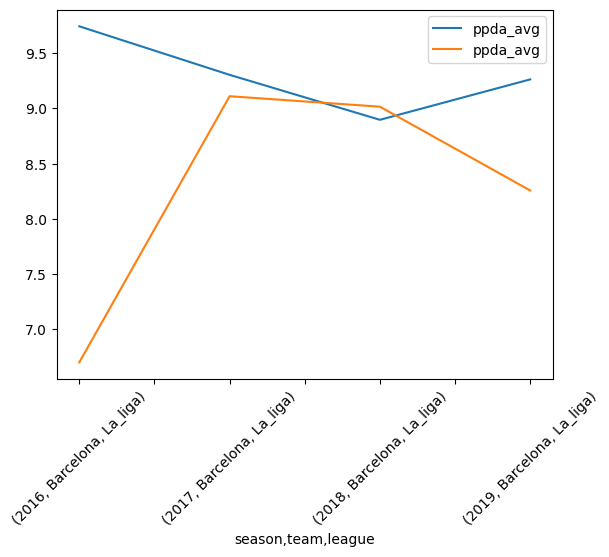

In [180]:
prime_rm['ppda_avg'].plot()
quiebre_barca['ppda_avg'].plot()
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [181]:
def cambio_de_estilo(ppda_anterior, ppda_nuevo):
    if (ppda_anterior - ppda_nuevo) > 0.4:
        return 'Temporada a la baja'
    elif (ppda_anterior - ppda_nuevo) < -0.3:
        return 'Temporada de subida'
    else:
        return 'Temporada normal'

In [161]:
rm_temporadas = df_final.query('team == "Real Madrid"')
barca_temporadas = df_final.query('team == "Barcelona"')

In [162]:
ppda_rm = rm_temporadas['ppda_avg'].to_list()
ppda_barca = barca_temporadas['ppda_avg'].to_list()

In [182]:
lista_estilo = []

index = 0

for season in ppda_rm:
    if index > 1:
        lista_estilo.append(cambio_de_estilo(ppda_rm[index - 1], season))
    index += 1

prime_rm['estilo'] = lista_estilo
prime_rm.head()

<ipython-input-182-e31c7062820c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prime_rm['estilo'] = lista_estilo


,,,points,wins,draws,defeats,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg,position,estilo
season,team,league,,,,,,,,,,,,
2016,Real Madrid,La_liga,93,29,6,3,106,41,8.763158,4.552632,9.742439,13.407533,1,Temporada de subida
2017,Real Madrid,La_liga,76,22,10,6,94,44,11.921053,4.947368,9.303382,13.999744,3,Temporada a la baja
2018,Real Madrid,La_liga,68,21,5,12,63,46,8.973684,4.421053,8.896578,14.782501,3,Temporada a la baja
2019,Real Madrid,La_liga,87,26,9,3,70,25,8.789474,3.342105,9.262202,14.476897,1,Temporada de subida


In [183]:
lista_estilo = []

index = 0

for season in ppda_barca:
    if index > 1:
        lista_estilo.append(cambio_de_estilo(ppda_barca[index - 1], season))
    index += 1

quiebre_barca['estilo'] = lista_estilo
quiebre_barca.head()

<ipython-input-183-9443efa545f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quiebre_barca['estilo'] = lista_estilo


,,,points,wins,draws,defeats,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg,position,estilo
season,team,league,,,,,,,,,,,,
2016,Barcelona,La_liga,90,28,6,4,116,37,14.526316,3.789474,6.702330,15.710111,2,Temporada de subida
2017,Barcelona,La_liga,93,28,9,1,99,29,13.894737,4.947368,9.109883,13.939373,1,Temporada de subida
2018,Barcelona,La_liga,87,26,9,3,90,36,10.973684,4.500000,9.015264,16.404885,1,Temporada normal
2019,Barcelona,La_liga,82,25,7,6,86,38,11.578947,3.842105,8.256988,17.961598,2,Temporada a la baja


# Actividad 3

In [19]:
df_agrupados_a3 = df.groupby(['season', 'team', 'league'])

In [185]:
dict_valores_a3 = {
    'points': df_agrupados_a3['pts'].apply(np.sum),
    'wins': df_agrupados_a3['result'].apply(lambda x: count_if_equal(x, 'w')),
    'draws':df_agrupados_a3['result'].apply(lambda x: count_if_equal(x, 'd')),
    'defeats': df_agrupados_a3['result'].apply(lambda x: count_if_equal(x, 'l')),
    'goals_scored': df_agrupados_a3['goals_scored'].apply(np.sum),
    'goals_missed': df_agrupados_a3['goals_missed'].apply(np.sum),
    'deep_passes_avg': df_agrupados_a3['deep_passes'].apply(np.mean),
    'deep_passes_allowed_avg': df_agrupados_a3['deep_passes_allowed'].apply(np.mean),
    'ppda_avg': df_agrupados_a3['ppda'].apply(np.mean),
    'oppda_avg': df_agrupados_a3['oppda'].apply(np.mean),
    'matches': df_agrupados_a3['pts'].count()
}
df_final_a3 = pd.DataFrame.from_dict(dict_valores_a3)

df_final_a3.sort_values(by=['season', 'points', 'goals_scored'], ascending=[True, False, False], inplace=True)

df_final_a3['position'] = df_final_a3.groupby(['season', 'league'])['points'].rank(ascending=False, method='first')
df_final_a3['position'] = df_final_a3['position'].astype(int)
df_final_a3.head(30)

points  wins  draws  defeats  \
season team                 league                                     
2014   Barcelona            La_liga         94    30      4        4   
       Real Madrid          La_liga         92    30      2        6   
       Chelsea              EPL             87    26      9        3   
       Juventus             Serie_A         87    26      9        3   
       Paris Saint Germain  Ligue_1         83    24     11        3   
       Manchester City      EPL             79    24      7        7   
       Bayern Munich        Bundesliga      79    25      4        5   
       Atletico Madrid      La_liga         78    23      9        6   
       Valencia             La_liga         77    22     11        5   
       Sevilla              La_liga         76    23      7        8   
       Lyon                 Ligue_1         75    22      9        7   
       Arsenal              EPL             75    22      9        7   
       Monaco               Ligue_1         71    20     11        7   
       Manchester United    EPL             70    20     10        8   
       Roma                 Serie_A         70    19     13        6   
       Marseille            Ligue_1         69    21      6       11   
       Wolfsburg            Bundesliga      69    20      9        5   
       Lazio                Serie_A         69    21      6       11   
       Saint-Etienne        Ligue_1         69    19     12        7   
       Zenit St. Petersburg RFPL            67    20      7        3   
       Borussia M.Gladbach  Bundesliga      66    19      9        6   
       Fiorentina           Serie_A         64    18     10       10   
       Tottenham            EPL             64    19      7       12   
       Napoli               Serie_A         63    18      9       11   
       Bordeaux             Ligue_1         63    17     12        9   
       Liverpool            EPL             62    18      8       12   
       Bayer Leverkusen     Bundesliga      61    17     10        7   
       CSKA Moscow          RFPL            60    19      3        8   
       Southampton          EPL             60    18      6       14   
       FC Krasnodar         RFPL            60    17      9        4   

                                        goals_scored  goals_missed  \
season team                 league                                   
2014   Barcelona            La_liga              110            21   
       Real Madrid          La_liga              118            38   
       Chelsea              EPL                   73            32   
       Juventus             Serie_A               72            24   
       Paris Saint Germain  Ligue_1               83            36   
       Manchester City      EPL                   83            38   
       Bayern Munich        Bundesliga            80            18   
       Atletico Madrid      La_liga               67            29   
       Valencia             La_liga               70            32   
       Sevilla              La_liga               71            45   
       Lyon                 Ligue_1               72            33   
       Arsenal              EPL                   71            36   
       Monaco               Ligue_1               51            26   
       Manchester United    EPL                   62            37   
       Roma                 Serie_A               54            31   
       Marseille            Ligue_1               76            42   
       Wolfsburg            Bundesliga            72            38   
       Lazio                Serie_A               71            38   
       Saint-Etienne        Ligue_1               51            30   
       Zenit St. Petersburg RFPL                  58            17   
       Borussia M.Gladbach  Bundesliga            53            26   
       Fiorentina           Serie_A               61            46   
       Tottenham            EPL                   58   

In [186]:
grouped = df_final_a3.groupby(level='league')[['goals_scored', 'matches']].sum()
grouped['deep_passes_avg'] = df_final_a3.groupby(level='league')[['deep_passes_avg']].mean()
grouped['ppda_avg'] = df_final_a3.groupby(level='league')[['ppda_avg']].mean()
grouped

,goals_scored,matches,deep_passes_avg,ppda_avg
league,,,,
Bundesliga,5396,3672,5.968682,11.170879
EPL,6189,4560,6.567544,11.847171
La_liga,6119,4560,5.631579,9.654516
Ligue_1,5610,4358,4.741817,11.028938
RFPL,3349,2880,5.992014,10.697584
Serie_A,6299,4550,5.997967,11.054684


In [192]:
grouped['goals_per_match'] = grouped['goals_scored'] / grouped['matches']
grouped

,goals_scored,matches,deep_passes_avg,ppda_avg,goals_per_match
league,,,,,
Bundesliga,5396,3672,5.968682,11.170879,1.469499
EPL,6189,4560,6.567544,11.847171,1.357237
La_liga,6119,4560,5.631579,9.654516,1.341886
Ligue_1,5610,4358,4.741817,11.028938,1.287288
RFPL,3349,2880,5.992014,10.697584,1.162847
Serie_A,6299,4550,5.997967,11.054684,1.384396


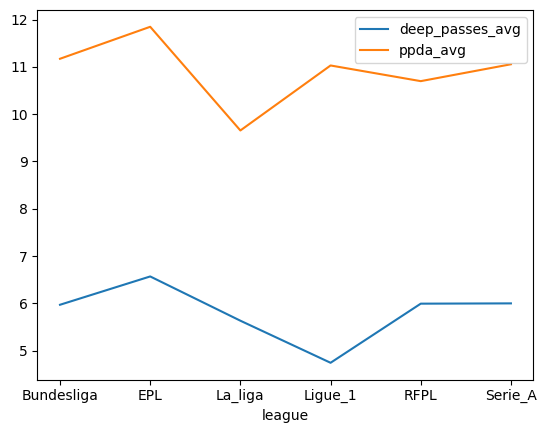

In [188]:
grouped['deep_passes_avg'].plot()
grouped['ppda_avg'].plot()
plt.legend()
plt.show()

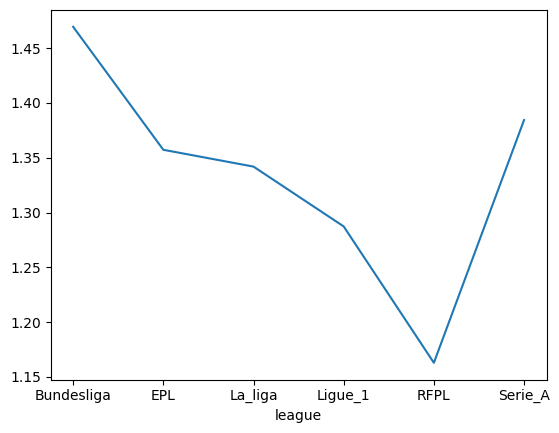

In [189]:
grouped['goals_per_match'].plot()
plt.show()

In [190]:
def clasificar_equipo_liga(deep_passes_avg, ppda_avg, goals_per_match, position):
    formula = 0.7 * deep_passes_avg + 0.9 * ppda_avg + 0.55 * goals_per_match + 0.15 * position
    if formula > 16.5:
        return 'EPL'
    elif formula > 15.5:
        return 'La_liga'
    elif formula > 14.5:
        return 'Serie_A'
    elif formula > 13.8:
        return 'Ligue_1'
    elif formula > 13:
        return 'Bundesliga'
    else:
        return 'RFPL'
    return formula

In [193]:
predict = df_final_a3.apply(lambda row: clasificar_equipo_liga(row['deep_passes_avg'], row['ppda_avg'], row['goals_scored'] / row['matches'], row['position']), axis=1)
correct_predictions = (predict == df_final_a3.index.get_level_values('league')).sum()
total_predictions = len(df)
accuracy = (correct_predictions / total_predictions) * 100
print("--------- Accuracy ------------")
print(accuracy)
print("--------- Predict -------------")
predict.head(15)
correct_predictions = (predict == df_final_a3.index.get_level_values('league'))

total_epl_predictions = (df_final_a3.index.get_level_values('league') == 'EPL').sum()
accuracy_epl = (correct_predictions[df_final_a3.index.get_level_values('league') == 'EPL'].sum() / total_epl_predictions) * 100
print(f"Porcentaje de acierto para 'EPL' : {accuracy_epl:.2f}%")

total_epl_predictions = (df_final_a3.index.get_level_values('league') == 'La_liga').sum()
accuracy_epl = (correct_predictions[df_final_a3.index.get_level_values('league') == 'La_liga'].sum() / total_epl_predictions) * 100
print(f"Porcentaje de acierto para 'La_liga' : {accuracy_epl:.2f}%")

total_epl_predictions = (df_final_a3.index.get_level_values('league') == 'Bundesliga').sum()
accuracy_epl = (correct_predictions[df_final_a3.index.get_level_values('league') == 'Bundesliga'].sum() / total_epl_predictions) * 100
print(f"Porcentaje de acierto para 'Bundelisga': {accuracy_epl:.2f}%")

total_epl_predictions = (df_final_a3.index.get_level_values('league') == 'Serie_A').sum()
accuracy_epl = (correct_predictions[df_final_a3.index.get_level_values('league') == 'Serie_A'].sum() / total_epl_predictions) * 100
print(f"Porcentaje de acierto para 'Serie_A': {accuracy_epl:.2f}%")

total_epl_predictions = (df_final_a3.index.get_level_values('league') == 'Ligue_1').sum()
accuracy_epl = (correct_predictions[df_final_a3.index.get_level_values('league') == 'Ligue_1'].sum() / total_epl_predictions) * 100
print(f"Porcentaje de acierto para 'Ligue_a1': {accuracy_epl:.2f}%")

total_epl_predictions = (df_final_a3.index.get_level_values('league') == 'RFPL').sum()
accuracy_epl = (correct_predictions[df_final_a3.index.get_level_values('league') == 'RFPL'].sum() / total_epl_predictions) * 100
print(f"Porcentaje de acierto para 'RFPL': {accuracy_epl:.2f}%")

--------- Accuracy ------------
0.5899104963384866
--------- Predict -------------
Porcentaje de acierto para 'EPL' : 65.00%
Porcentaje de acierto para 'La_liga' : 19.17%
Porcentaje de acierto para 'Bundelisga': 8.33%
Porcentaje de acierto para 'Serie_A': 14.17%
Porcentaje de acierto para 'Ligue_a1': 11.67%
Porcentaje de acierto para 'RFPL': 4.17%


In [195]:
predict.head(30)

season  team                  league    
2014    Barcelona             La_liga          La_liga
        Real Madrid           La_liga              EPL
        Chelsea               EPL                  EPL
        Juventus              Serie_A          Serie_A
        Paris Saint Germain   Ligue_1       Bundesliga
        Manchester City       EPL                  EPL
        Bayern Munich         Bundesliga       Serie_A
        Atletico Madrid       La_liga       Bundesliga
        Valencia              La_liga       Bundesliga
        Sevilla               La_liga          Serie_A
        Lyon                  Ligue_1       Bundesliga
        Arsenal               EPL                  EPL
        Monaco                Ligue_1             RFPL
        Manchester United     EPL           Bundesliga
        Roma                  Serie_A       Bundesliga
        Marseille             Ligue_1             RFPL
        Wolfsburg             Bundesliga    Bundesliga
        Lazio           